In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import rdkit
from rdkit.Chem.AllChem import GetMorganGenerator, GetRDKitFPGenerator
from rdkit import DataStructs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [156]:
from utils import getMolFromSmile
from rdkit.Chem import PandasTools

PandasTools.RenderImagesInAllDataFrames(images=True)

df_smile = pd.read_csv('dataset.csv')
df_smile.head(2)


,reactant_1,reactant_2,reactant_3,product_R,product_S,solvent,catalyst_1,catalyst_2,product_undesired_R,product_undesired_S,ee_R,ee_S,ee_undesired_R,ee_undesired_S,yield_undesired_R,yield_undesired_S,reaction
0,c1ccc(C(=O)CBr)cc1,Cc1cccc(C)n1,C#CCCCCC=O,C#CCCC[C@H](C=O)CC(=O)c1ccccc1,C#CCCC[C@@H](C=O)CC(=O)c1ccccc1,CN(C)C=O,C1COCCN1,F[P](F)(F)(F)(F)F.CC(C)(C)C1=CC=[N@H]2C(=C1)C3...,O=C[C@@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc...,O=C[C@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc3...,0.63,-0.63,0.0,0.0,0.095598,0.094402,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C1COCCN1.F[P](F)...
1,c1ccc(C(=O)CBr)cc1,Cc1cccc(C)n1,C#CCCCCC=O,C#CCCC[C@H](C=O)CC(=O)c1ccccc1,C#CCCC[C@@H](C=O)CC(=O)c1ccccc1,CN(C)C=O,C[Si](C)(C)OC(c1ccccc1)(c1ccccc1)[C@@H]1CCCN1,F[P](F)(F)(F)(F)F.CC(C)(C)C1=CC=[N@H]2C(=C1)C3...,O=C[C@@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc...,O=C[C@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc3...,44.66,-44.66,0.0,0.0,0.412281,0.157719,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C[Si](C)(C)OC(c1...


In [157]:
print(f'Number of reactions: {len(df_smile)}')
print(f'Number of reactants 1: {len(df_smile["reactant_1"].unique())}')
print(f'Number of reactants 2: {len(df_smile["reactant_2"].unique())}')
print(f'Number of reactants 3: {len(df_smile["reactant_3"].unique())}')
print(f'Number of solvents: {len(df_smile["solvent"].unique())}')
print(f'Number of catalysts 1: {len(df_smile["catalyst_1"].unique())}')
print(f'Number of catalysts 2: {len(df_smile["catalyst_2"].unique())}')
print(f'Number of products: {len(df_smile["product_R"].unique())}')
print(f'Number of undesired products: {len(df_smile["product_undesired_R"].unique())}')

Number of reactions: 1430
Number of reactants 1: 10
Number of reactants 2: 1
Number of reactants 3: 1
Number of solvents: 1
Number of catalysts 1: 11
Number of catalysts 2: 13
Number of products: 10
Number of undesired products: 10


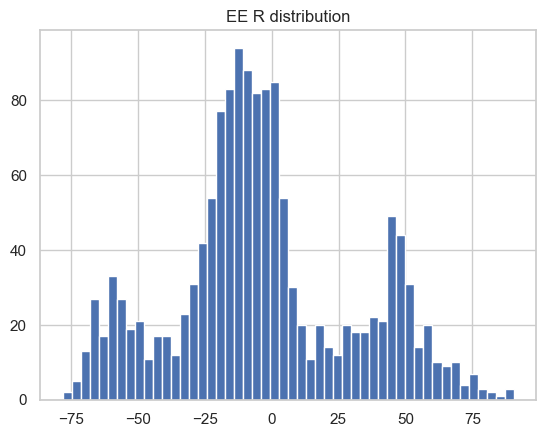

In [158]:
plt.title('EE R distribution')
plt.hist(df_smile['ee_R'], bins=50)
plt.show()

,reactant_1,reactant_2,reactant_3,product_R,product_S,solvent,catalyst_1,catalyst_2,product_undesired_R,product_undesired_S,ee_R,ee_S,ee_undesired_R,ee_undesired_S,yield_undesired_R,yield_undesired_S,reaction
0,,,,,,,,,,,0.630000,-0.630000,0.0,0.0,0.095598,0.094402,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C1COCCN1.F[P](F)...
1,,,,,,,,,,,44.660000,-44.660000,0.0,0.0,0.412281,0.157719,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C[Si](C)(C)OC(c1...
2,,,,,,,,,,,79.949997,-79.949997,0.0,0.0,0.350902,0.039098,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C[C@@H]1[NH2+][C...
3,,,,,,,,,,,-60.880001,60.880001,0.0,0.0,0.230808,0.949192,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C[Si](C)(C)OC(c1...
4,,,,,,,,,,,-5.160000,5.160000,0.0,0.0,0.194422,0.215578,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>O=C(O)[C@H]1CCCN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,,,,,,,,,,,-15.680000,15.680000,0.0,0.0,0.261392,0.358608,C#CCCCCC=O.FC(F)(F)Oc1ccc(C(=O)CBr)cc1>O=C(O)[...
1426,,,,,,,,,,,-8.460000,8.460000,0.0,0.0,0.064078,0.075922,C#CCCCCC=O.FC(F)(F)Oc1ccc(C(=O)CBr)cc1>O=C(O)[...
1427,,,,,,,,,,,-15.590000,15.590000,0.0,0.0,0.122395,0.167606,C#CCCCCC=O.FC(F)(F)Oc1ccc(C(=O)CBr)cc1>NC(=O)C...
1428,,,,,,,,,,,-41.060001,41.060001,0.0,0.0,0.091357,0.218643,C#CCCCCC=O.FC(F)(F)Oc1ccc(C(=O)CBr)cc1>O=C(O)[...

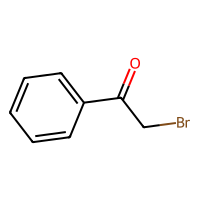
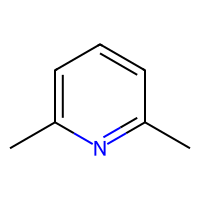
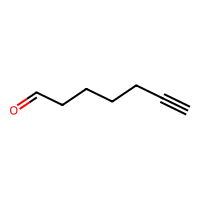
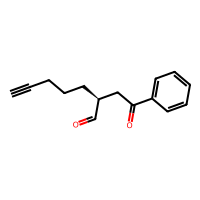
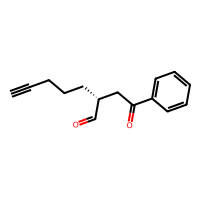
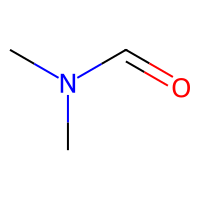
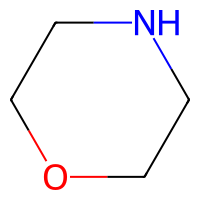
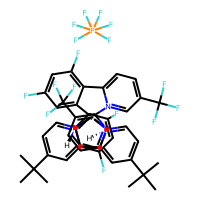
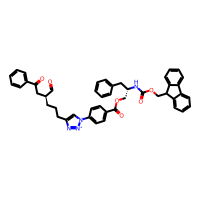
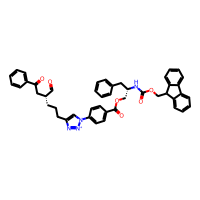
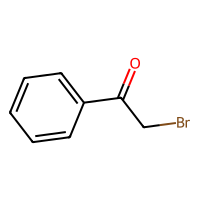
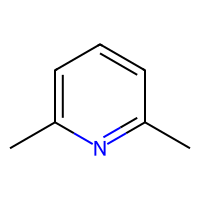
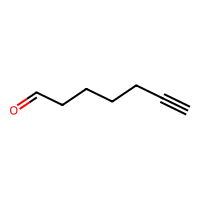
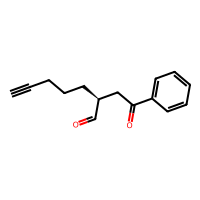
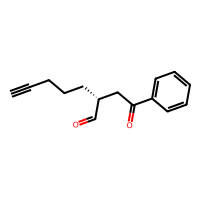
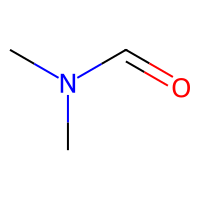
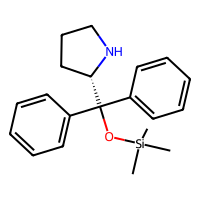
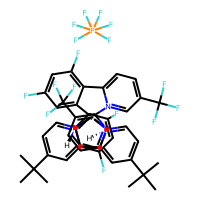
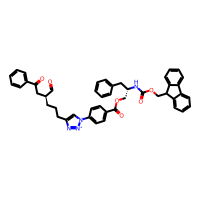
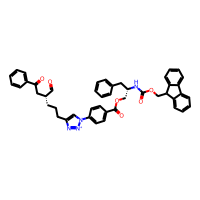
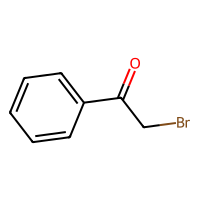
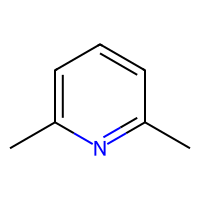
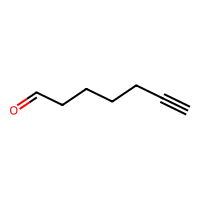
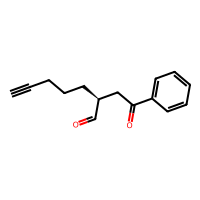
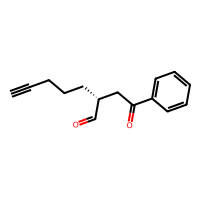
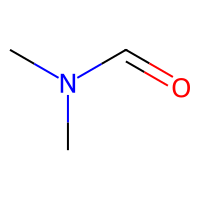
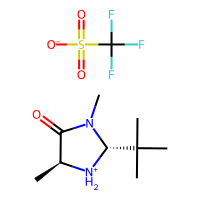
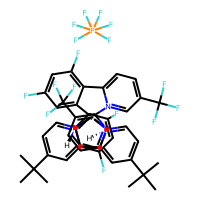
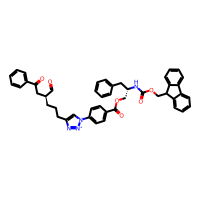
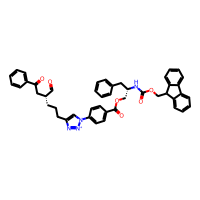
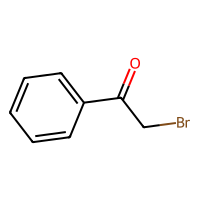
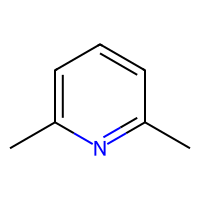
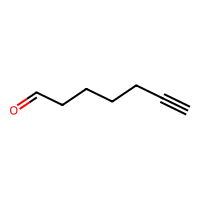
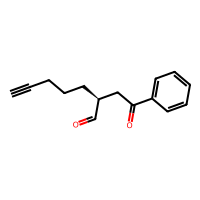
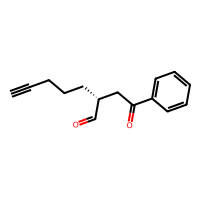
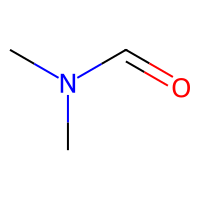
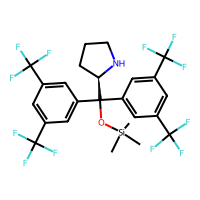
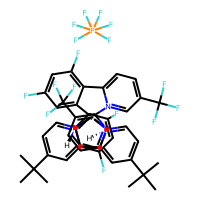
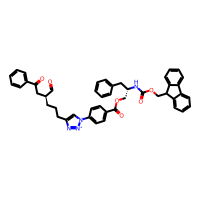
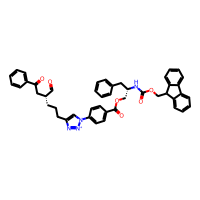
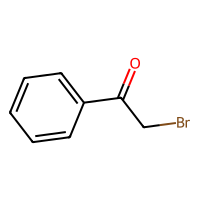
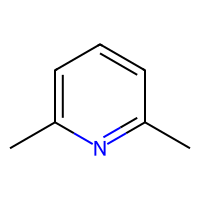
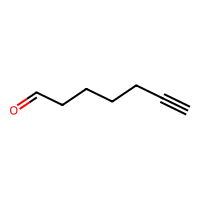
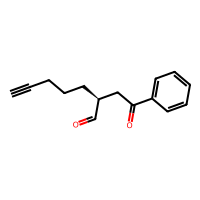
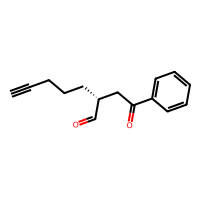
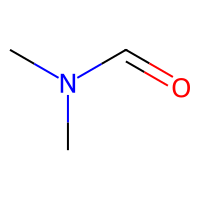
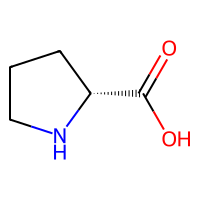
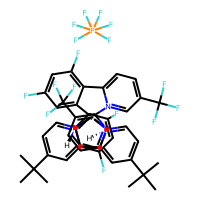
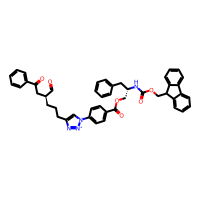
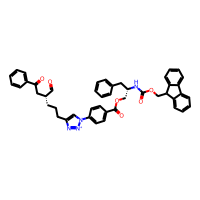
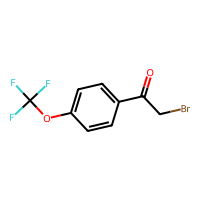
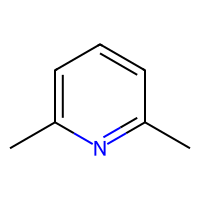
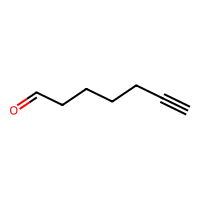
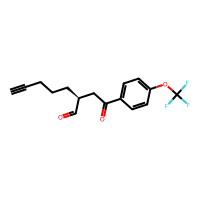
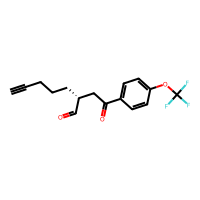
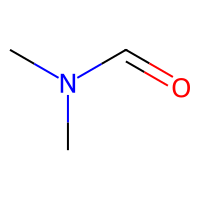
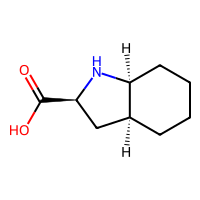
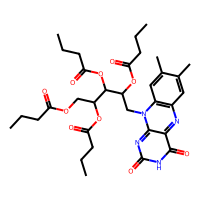
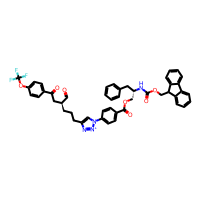
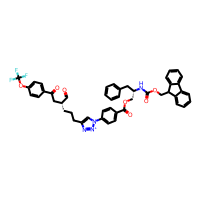
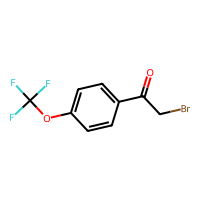
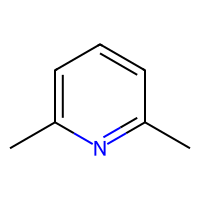
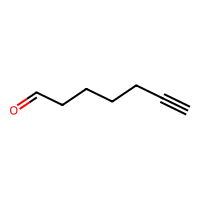
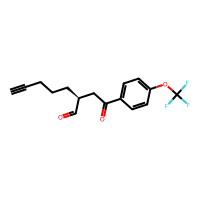
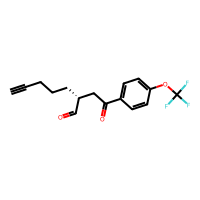
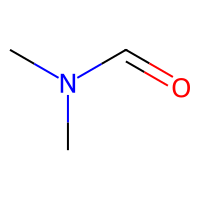
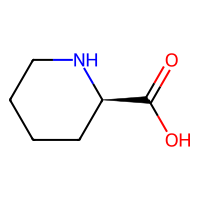
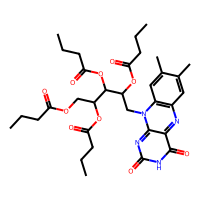
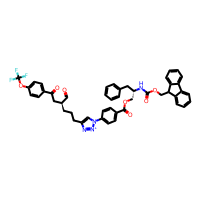
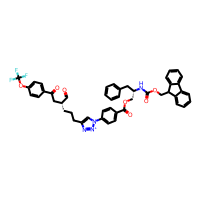
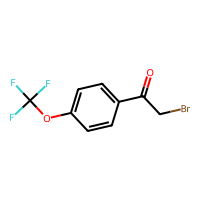
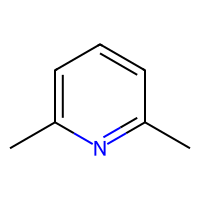
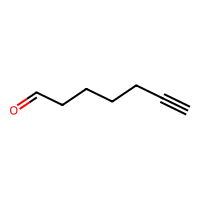
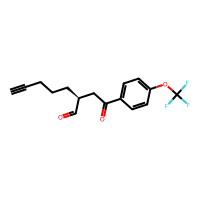
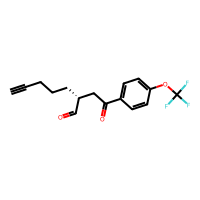
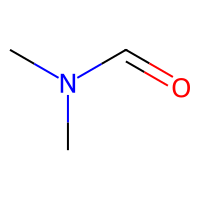
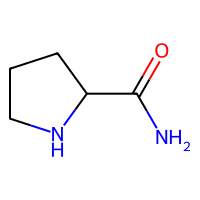
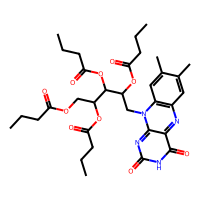
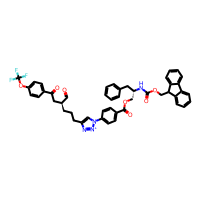
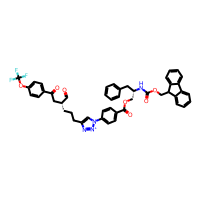
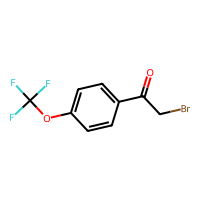
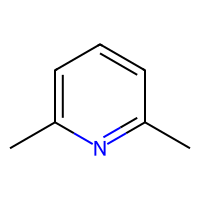
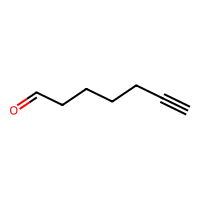
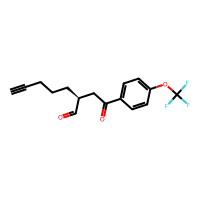
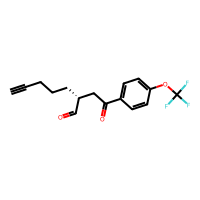
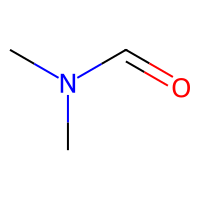
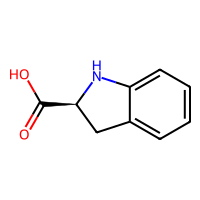
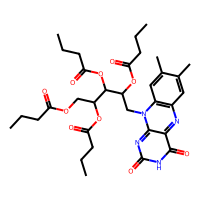
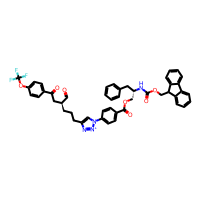
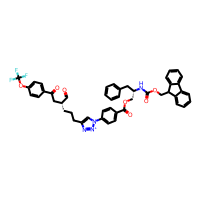
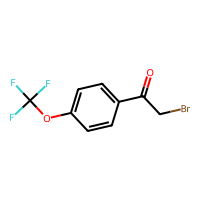
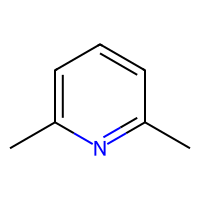
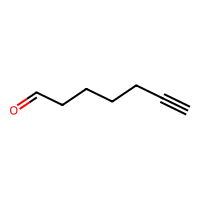
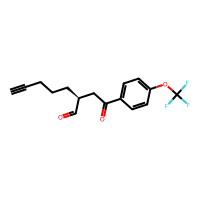
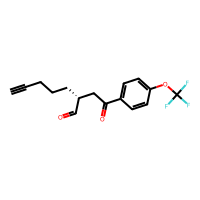
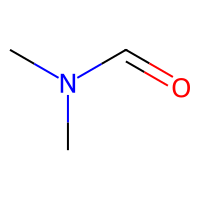
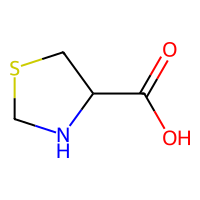
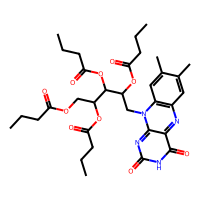
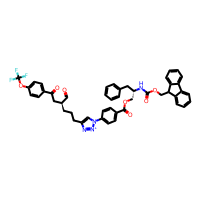
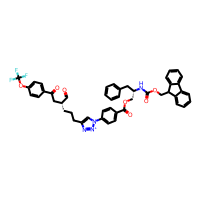

In [159]:
df_mol = df_smile.copy()

smile_columns = ['reactant_1','reactant_2', 'reactant_3', 'product_R', 'product_S', 'solvent', 'catalyst_1', 'catalyst_2', 'product_undesired_R', 'product_undesired_S']


for smile_column in smile_columns:
  #isolate the problematic smiles
  if smile_column =='catalyst_2' or smile_column =='product_undesired_R' or smile_column =='product_undesired_S':
    df_mol[smile_column] = df_mol[smile_column].apply(lambda x: getMolFromSmile(x, sanitize=False))

  else:
    df_mol[smile_column] = df_mol[smile_column].apply(getMolFromSmile)

print('WARNING: catalyst_2, product_undesired_R and product_undesired_S were not sanitized, i.e. some molecules may not be properly defined.')

df_mol

,reactant_1,reactant_2,reactant_3,product_R,product_S,solvent,catalyst_1,catalyst_2,product_undesired_R,product_undesired_S,ee_R,ee_S,ee_undesired_R,ee_undesired_S,yield_undesired_R,yield_undesired_S,reaction
156,,,,,,,,,,,90.449997,-90.449997,0.0,0.0,0.295197,0.014803,C#CCCCCC=O.Cc1ccc(C(=O)CBr)cc1>C[C@@H]1[NH2+][...

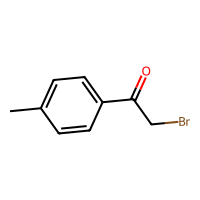
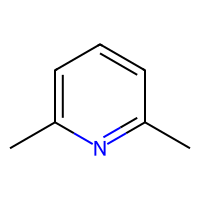
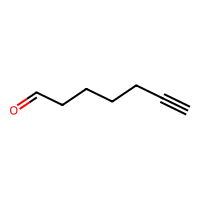
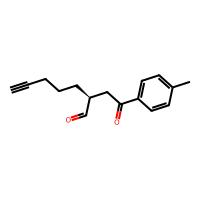
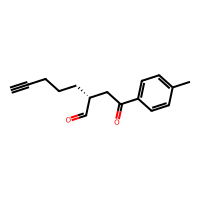
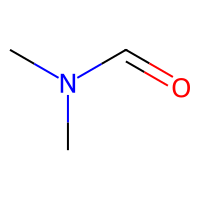
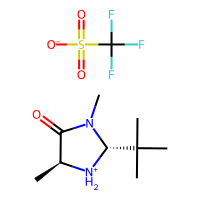
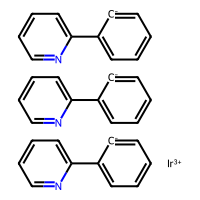
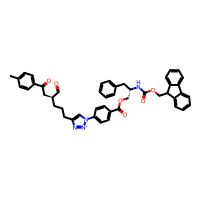
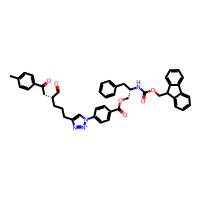

In [160]:
best_reaction = df_mol[df_mol['ee_R'] == df_mol['ee_R'].max()]
best_reaction